In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from skpsl.estimators import MulticlassScoringList
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/player_processed.csv")
X = df.iloc[:,1:]
y = df.iloc[:,0]
#mask = y != "Midfielder" #&  y != "Forward"
#X = X[mask]
#y = y[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

100%|██████████| 2401/2401 [00:05<00:00, 456.58it/s]


0.34219269102990035
0.4839424141749723
0.5647840531561462
0.6223698781838317
0.6234772978959026
0.717607973421927
0.7253599114064231
0.7198228128460686
0.7242524916943521
0.7342192691029901
0.7253599114064231
0.7308970099667774
0.7187153931339978


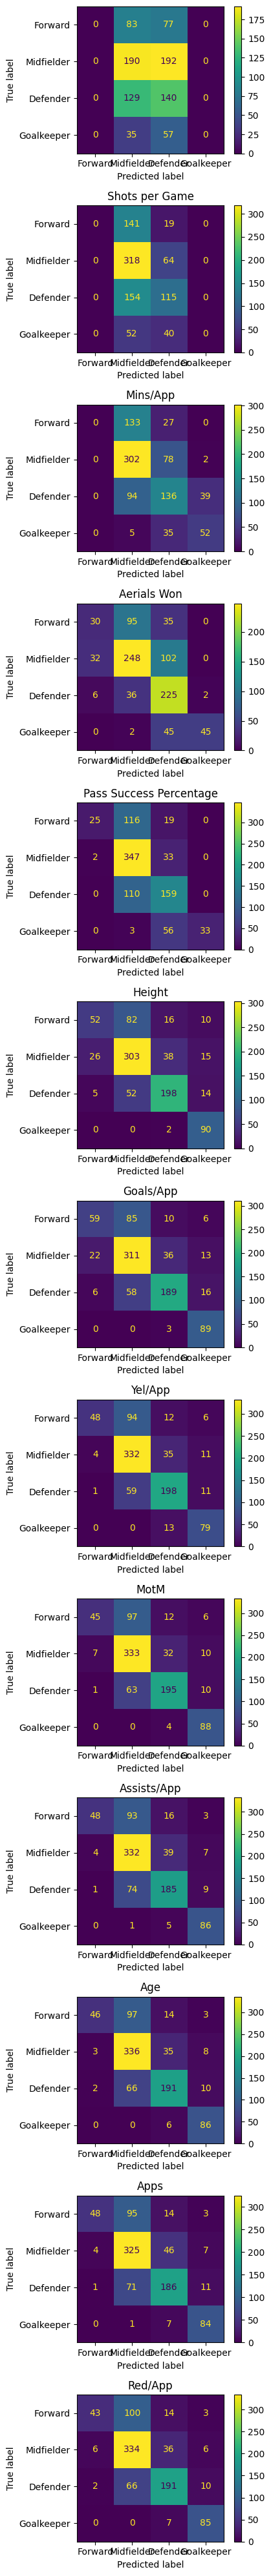

In [3]:
clf = MulticlassScoringList(score_set=set(range(-3,4)), method="greedy").fit(X_train,y_train)

fig, ax = plt.subplots(len(clf)+1, figsize=(4,40))
for i in range(len(clf)+1):
    ConfusionMatrixDisplay.from_predictions(y_test, clf[i].predict(X_test), ax=ax[i], labels=["Forward", "Midfielder", "Defender", "Goalkeeper"])
    print(clf[i].score(X_test,y_test))
    if i > 0:
        ax[i].set_title(X.columns[np.argwhere(clf.f_ranks == i-1).item()])
plt.tight_layout()

In [4]:
clf.inspect(X.columns)

,Feature,Thresholds (>),Defender,Forward,Goalkeeper,Midfielder
0,,NaN,1,0,0,1
1,Shots per Game,0.650000,1,3,-3,3
2,Mins/App,80.027652,2,-2,3,-1
3,Aerials Won,0.850000,3,3,-2,2
4,Pass Success Percentage,73.050000,2,2,1,3
5,Height,183.500000,-2,-2,0,-3
6,Goals/App,0.079596,1,3,-3,3
7,Yel/App,0.101572,3,2,1,3
8,MotM,0.500000,-3,-3,-2,-3
9,Assists/App,0.038925,3,3,0,3


8.373200442967885

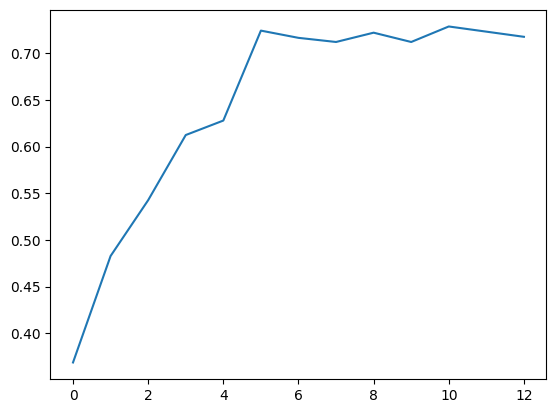

In [5]:
sns.lineplot([stage.score(X_test,y_test) for stage in clf])
clf.score(X_test,y_test)

(8.644017725258493,
 [0.3655834564254062,
  0.49963072378138845,
  0.5546528803545052,
  0.6532496307237814,
  0.6558345642540621,
  0.7355982274741507,
  0.7477843426883308,
  0.7370753323485968,
  0.741506646971935,
  0.7448301329394387,
  0.7437223042836041,
  0.7433530280649926,
  0.7455686853766618])

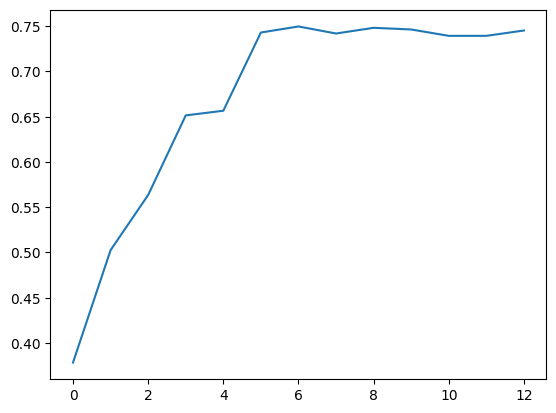

In [6]:
sns.lineplot([stage.score(X_train,y_train) for stage in clf])
clf.score(X_train,y_train), [stage.score(X_train,y_train) for stage in clf]

In [7]:
clf[0]._logit(np.array([[0]*12,[1]*12]), k=1)

array([[ 1,  0,  0,  1],
       [ 2,  3, -3,  4]])

In [8]:
clf.scores

array([[ 1,  3, -2,  3,  2,  1,  3,  3,  3,  1,  2,  3, -3],
       [ 0,  3, -2,  3, -2,  3,  3,  2,  3,  3,  2,  3, -3],
       [ 0,  3,  0,  3,  3, -3,  0,  1,  3, -3,  1, -2, -2],
       [ 1,  3, -3,  3, -1,  3,  3,  3,  3,  3,  3,  2, -3]])

In [9]:
clf.f_ranks

array([ 9,  4, 10,  1,  5,  8,  6, 11,  0,  3,  2,  7])